<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio NLP + Sist. Recomendación


En este laboratorio, tabrajaras con datos de reseñas de productos para construir un sistema de recomendación que utilice procesamiento de lenguaje natural (NLP) y *machine learning*. El objetivo principal es que analices el contenido textual de las reseñas, clasifiques las opiniones en categorías (positiva, negativa o neutra) y aproveches esta información para personalizar las recomendaciones. El sistema priorizará los productos con mejores reseñas para usuarios específicos y permitirá evaluar si el análisis de sentimientos mejora la calidad de las recomendaciones. Tareas propuestas:


**Caso 1: Crear un sistema de recomendación**: Debes generar un sistema de recomendación para priorizar productos con las reseñas para cada usuario. Los pasos que deberás seguir son:    

- Estructurar el conjunto de datos

- Sistema basado en contenido


**Caso 2: Clasificar reseñas en positivas, negativas o neutras** Deberás implementar un modelo para analizar las reseñas textuales y clasificarlas en tres categorías:

- Positivas: Si el sentimiento de la reseña es favorable.

- Negativas: Si el sentimiento de la reseña es desfavorable.

- Neutras: Si la reseña no tiene un sentimiento claro.
	
- Pasos :
	- Preprocesamiento de texto: Limpiar las reseñas eliminando caracteres especiales, palabras vacías (stopwords) y realizar lematización.
	
	- Identificar las reseñas positivas, negativas y neutrales. 


Los datos los tendréis en el [siguiente enlace](https://drive.google.com/drive/u/0/folders/1vK5zESy9KElRhm_utg_lHHXuUArrwWgu) con la descipción de cada una de las columnas.  

In [18]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import os 
import sys

sys.path.append("../")
# Importamos las clases
# -----------------------------------------------------------------------
from src import soporte_nlp as sn

# Configuración de pandas
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)

import warnings

In [19]:
df = pd.read_csv("data/datos (1).csv", index_col=0)
df = df[["mainDepartment", "reviewText"]]
df.reset_index(drop=True, inplace=True)

In [20]:
df

mainDepartment  \
0          Sports and Outdoors   
1                    Computers   
2                    Computers   
3             Home and Kitchen   
4     Beauty and Personal Care   
...                        ...   
9995          Home and Kitchen   
9996       Sports and Outdoors   
9997       Sports and Outdoors   
9998                 Computers   
9999          Home and Kitchen   

                                             reviewText  
0     Nice lightweight brace but unfortunately was t...  
1     Boxers were ok. The color did start to fade pr...  
2     Very easy to install. Worked right away but it...  
3     The color is completely different than hunter ...  
4     From reading the reviews, I was hoping that th...  
...                                                 ...  
9995  This scale is great for food prep. It is fast ...  
9996  Comfortable but a little small.  Rides down on...  
9997  Really great volleyball for the water!! Only p...  
9998                 Good fit and  comfortable to wear.  
9999  These are great pillows, just not for me. They...  

[10000 rows x 2 columns]

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   mainDepartment  10000 non-null  object
 1   reviewText      9999 non-null   object
dtypes: object(2)
memory usage: 156.4+ KB
None

Descripción del DataFrame:
                count unique        top  freq
mainDepartment  10000      5  Computers  3071
reviewText       9999   9928       Nice     7

Distribución de clases en la columna 'mainDepartment':
mainDepartment
Computers                   3071
Beauty and Personal Care    2104
Electronics                 1747
Home and Kitchen            1662
Sports and Outdoors         1416
Name: count, dtype: int64


c:\Users\almaz\Hackio\laboratoriohackio\laboratorio-modulo09-leccion06-nlp-LAB\src\soporte_nlp.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


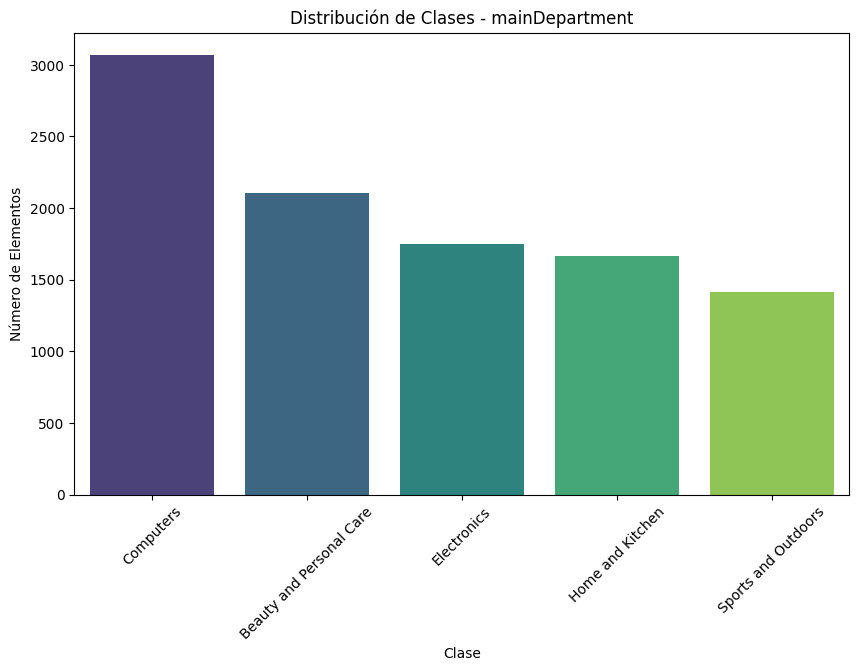

Limpiando el texto...
Texto limpiado y listo.
Generando nubes de palabras...


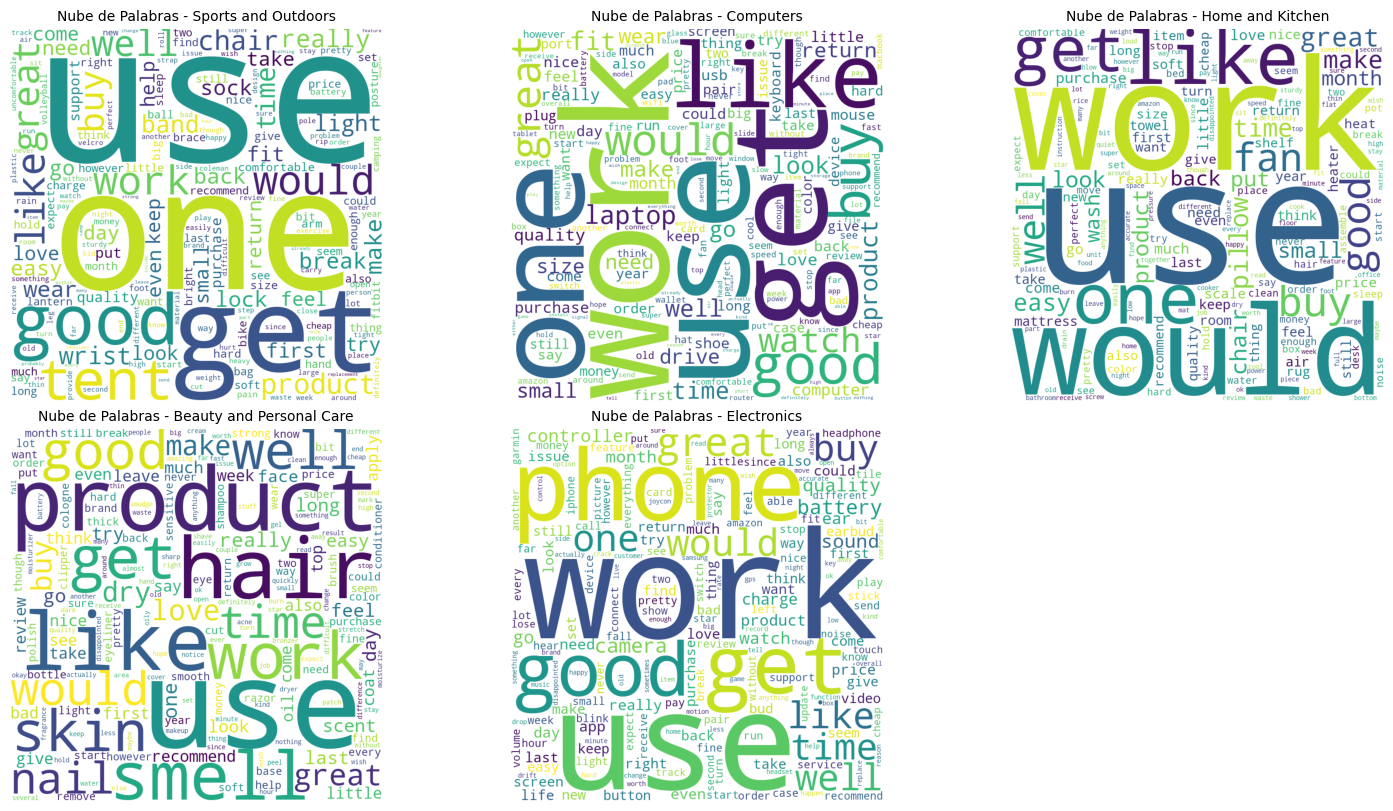

mainDepartment  \
0       Sports and Outdoors   
1                 Computers   
2                 Computers   
3          Home and Kitchen   
4  Beauty and Personal Care   

                                          reviewText  \
0  Nice lightweight brace but unfortunately was t...   
1  Boxers were ok. The color did start to fade pr...   
2  Very easy to install. Worked right away but it...   
3  The color is completely different than hunter ...   
4  From reading the reviews, I was hoping that th...   

                                        cleaned_text  
0  nice lightweight brace unfortunately large wri...  
1  boxer ok color start fade pretty quickly becom...  
2  easy install work right away go far expectedit...  
3  color completely different hunter green andor ...  
4  read review hope shampoo conditioner would ext...

In [21]:
# Instanciar la clase con las columnas relevantes
GestorNlp = sn.ExploracionText(dataframe=df, text_column='reviewText', label_column='mainDepartment', language="english")

# Explorar los datos
GestorNlp.explorar_datos()

# Limpiar los textos
GestorNlp.limpiar_textos("cleaned_text")

# Generar nubes de palabras
GestorNlp.generar_wordclouds()

# Obtener el DataFrame limpio
df_limpio = GestorNlp.obtener_dataframe_limpio()

# Ver las primeras filas del DataFrame limpio
df_limpio.head()


In [22]:
# instanciamos la clase
GestorTexto = sn.RepresentacionTexto(dataframe=df_limpio, text_column='cleaned_text')

# representamos el texto usando  Bag of Words
bow_df = GestorTexto.generar_bow()
print("Bag of Words:")
display(bow_df.sample(10))

# representamos el texto usando TF-IDF
tfidf_df = GestorTexto.generar_tfidf()
print("TF-IDF:")
display(tfidf_df.sample(10))

# representammos el texto usando  Embeddings
embeddings_df = GestorTexto.generar_embeddings()
print("Embeddings:")
display(embeddings_df.sample(10))

c:\Users\almaz\.conda\envs\data\lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Generando Bag of Words...
Bag of Words generado.
Bag of Words:


mainDepartment  \
4206                 Computers   
1918                 Computers   
9353  Beauty and Personal Care   
5919                 Computers   
999   Beauty and Personal Care   
3882               Electronics   
4552               Electronics   
7869       Sports and Outdoors   
4707                 Computers   
1216          Home and Kitchen   

                                             reviewText  \
4206  Good fit for women, would buy again. Nice qual...   
1918    Liked the quality of glassesLight weightStylish   
9353  My hairdresser said I got poor results (dry, f...   
5919  Just plug it in and go. Super easy. Just a few...   
999   I battle extremely dry skin,I applied this lot...   
3882                     i like it but it cracks easily   
4552                        Good product for the price!   
7869  Got these socks for the upcoming cross country...   
4707  Decent price for 8 port semi-managed switch. M...   
1216  Great products. Decent size and works well for...   

                                           cleaned_text  aa  ability  able  \
4206              good fit woman would buy nice quality   0        0     0   
1918            like quality glasseslight weightstylish   0        0     0   
9353  hairdresser say get poor result dry frizzy hai...   0        0     0   
5919  plug go super easy thing port sit apart other ...   0        0     0   
999   battle extremely dry skini apply lotion every ...   0        0     0   
3882                                  like crack easily   0        0     0   
4552                                 good product price   0        0     0   
7869  get sock upcoming cross country season thus fa...   0        0     0   
4707  decent price port semimanage switch issue wish...   0        0     3   
1216    great product decent size work well office need   0        0     0   

      abrasive  abs  absolute  absolutely  absorb  absorbency  absorbent  \
4206         0    0         0           0       0           0          0   
1918         0    0         0           0       0           0          0   
9353         0    0         0           0       0           0          0   
5919         0    0         0           0       0           0          0   
999          0    0         0           0       0           0          0   
3882         0    0         0           0       0           0          0   
4552         0    0         0           0       0           0          0   
7869         0    0         0           0       0           0          0   
4707         0    0         0           0       0           0          0   
1216         0    0         0           0       0           0          0   

      absorbing  absorption  absurd  abuse  ac  accent  accentuate  accept  \
4206          0           0       0      0   0       0           0       0   
1918          0           0       0      0   0       0           0       0   
9353          0           0       0      0   0       0           0       0   
5919          0           0       0      0   0       0           0       0   
999           0           0       0      0   0       0           0       0   
3882          0           0       0      0   0       0           0       0   
4552          0           0       0      0   0       0           0       0   
7869          0           0       0      0   0       0           0       0   
4707          0           0       0      0   0       0           0       0   
1216          0           0       0      0   0       0           0       0   

      acceptable  access  accessible  accessory  accident  accidental  \
4206           0       0           0          0         0           0   
1918           0       0           0          0         0           0   
9353           0       0           0          0         0           0   
5919           0       0           0          0         0           0   
999            0       0           0          0         0           0  

Generando representación TF-IDF...
Representación TF-IDF generada.
TF-IDF:


mainDepartment  \
3133                 Computers   
9249       Sports and Outdoors   
8197                 Computers   
4602                 Computers   
7186  Beauty and Personal Care   
5848  Beauty and Personal Care   
671                Electronics   
8939                 Computers   
7918                 Computers   
6670               Electronics   

                                             reviewText  \
3133                          I don’t like doesn’t work   
9249  Pros - good price and comfortableCons:  Won't ...   
8197  I work remotely and this 5 port switch started...   
4602  The blue does not match the photo. Returning it .   
7186  These are super easy to use to clean up peach ...   
5848                   Poor quality broke after 2 uses.   
671                                          It's fine.   
8939  Nice but the shirts were a little smaller than...   
7918  Really wanted to like these, but they were waa...   
6670  For the money it costs, to purchase these type...   

                                           cleaned_text   aa  ability  able  \
3133                                          like work  0.0      0.0   0.0   
9249  pro good price comfortablecon stay foot size m...  0.0      0.0   0.0   
8197  work remotely port switch start extremely poor...  0.0      0.0   0.0   
4602                            blue match photo return  0.0      0.0   0.0   
7186  super easy use clean peach fuzz fine hair arou...  0.0      0.0   0.0   
5848                             poor quality break use  0.0      0.0   0.0   
671                                                fine  0.0      0.0   0.0   
8939                     nice shirt little small expect  0.0      0.0   0.0   
7918            really want like waaayy big narrow face  0.0      0.0   0.0   
6670  money cost purchase type item would expect wou...  0.0      0.0   0.0   

      abrasive  abs  absolute  absolutely  absorb  absorbency  absorbent  \
3133       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
9249       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
8197       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
4602       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
7186       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
5848       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
671        0.0  0.0       0.0         0.0     0.0         0.0        0.0   
8939       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
7918       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
6670       0.0  0.0       0.0         0.0     0.0         0.0        0.0   

      absorbing  absorption  absurd  abuse   ac  accent  accentuate  accept  \
3133        0.0         0.0     0.0    0.0  0.0     0.0         0.0     0.0   
9249        0.0         0.0     0.0    0.0  0.0     0.0         0.0     0.0   
8197        0.0         0.0     0.0    0.0  0.0     0.0         0.0     0.0   
4602        0.0         0.0     0.0    0.0  0.0     0.0         0.0     0.0   
7186        0.0         0.0     0.0    0.0  0.0     0.0         0.0     0.0   
5848        0.0         0.0     0.0    0.0  0.0     0.0         0.0     0.0   
671         0.0         0.0     0.0    0.0  0.0     0.0         0.0     0.0   
8939        0.0         0.0     0.0    0.0  0.0     0.0         0.0     0.0   
7918        0.0         0.0     0.0    0.0  0.0     0.0         0.0     0.0   
6670        0.0         0.0     0.0    0.0  0.0     0.0         0.0     0.0   

      acceptable  access  accessible  accessory  accident  accidental  \
3133         0.0     0.0         0.0        0.0       0.0         0.0   
9249         0.0     0.0         0.0        0.0       0.0         0.0   
8197         0.0     0.0         0.0        0.0       0.0         0.0   
4602         0.0     0.0         0.0        0.0       0.0         0.0   
7186         0.0     0.0         0.0        0.0  

Generando embeddings...
Embeddings generados.
Embeddings:


mainDepartment  \
3424               Electronics   
8552          Home and Kitchen   
1281                 Computers   
3152       Sports and Outdoors   
2817          Home and Kitchen   
2119               Electronics   
1680               Electronics   
3938  Beauty and Personal Care   
7654  Beauty and Personal Care   
2507  Beauty and Personal Care   

                                             reviewText  \
3424  The glass doesn't fit my phone...it hangs over...   
8552  Easy to put together pretty sturdy way smaller...   
1281  First off, I've been wearing fossil watches fo...   
3152  This brace doesn’t work. I tighten the brace t...   
2817  This thing is all sorts of wrong. First paint ...   
2119  Sound quality really bad, could barely hear th...   
1680               It’s really heavy for a pet tracker.   
3938  These Harperton nail clippers are very impress...   
7654  The color is a bit too light for me yet I love...   
2507  Absorbs nicely. Doesn't irritate my sensitive ...   

                                           cleaned_text  embedding_0  \
3424          glass fit phoneit hang side case fit uggg     0.058349   
8552   easy put together pretty sturdy way small expect    -0.101079   
1281  first wear fossil watch around yrs quite colle...     0.214139   
3152  brace work tighten brace end hope would restri...     0.435436   
2817  thing sort wrong first paint chip look like pl...     0.517413   
2119  sound quality really bad could barely hear gam...     0.153616   
1680                           really heavy pet tracker     0.302701   
3938  harperton nail clipper impressive high quality...     0.325962   
7654                 color bit light yet love way smell     0.097565   
2507  absorb nicely irritate sensitive skin light fr...    -0.112836   

      embedding_1  embedding_2  embedding_3  embedding_4  embedding_5  \
3424    -0.276291     0.658254     0.017436     0.196139     0.040541   
8552    -0.014781     0.026238     0.198880     0.334907    -0.158693   
1281    -0.078171     0.562233    -0.059097     0.391470    -0.214300   
3152    -0.173475     0.423040    -0.143001     0.325894     0.097003   
2817    -0.034204     0.329627    -0.016086     0.479450     0.204341   
2119    -0.053843     0.379531     0.060204     0.373470    -0.109463   
1680    -0.094662     0.208809     0.128453     0.136945    -0.025916   
3938    -0.019084     0.224498     0.302223     0.416943     0.000786   
7654    -0.301758     0.623299     0.062568     0.350686    -0.143869   
2507     0.136278     0.143498     0.146078     0.065008    -0.122352   

      embedding_6  embedding_7  embedding_8  embedding_9  embedding_10  \
3424     0.218723    -0.246656     0.045314    -0.183464      0.149312   
8552     0.011023    -0.036478    -0.005803    -0.300564      0.350609   
1281    -0.032789     0.317834     0.049614    -0.125551      0.240869   
3152     0.650537     0.054849     0.245362    -0.139217      0.144880   
2817     0.179452     0.040829    -0.180069    -0.301237      0.252677   
2119     0.525720     0.337367     0.125065    -0.035338      0.326881   
1680    -0.108325     0.065958     0.015469     0.111636      0.294074   
3938    -0.085379     0.275015     0.159147    -0.202739      0.237598   
7654     0.268331     0.075664     0.388232    -0.318487      0.014150   
2507     0.313526    -0.040806     0.259875    -0.282005      0.185042   

      embedding_11  embedding_12  embedding_13  embedding_14  embedding_15  \
3424      0.036308     -0.273327      0.470114     -0.215271      0.093157   
8552     -0.178405      0.209065      0.014250     -1.256054      0.139579   
1281     -0.327385      0.167918      0.428863     -0.667617      0.166962   
3152      0.085807      0.048281      0.055578     -0.850022      0.112420   
2817     -0.230801      0.192965      0.283027     -1.070124      0.104890   
2119     -0.347246      0.431908      0.375059     -0.815840      0.207974   
1680     -0.307118     -0.189052 

Aplicando PCA para reducir 768 dimensiones a 50 dimensiones...
Reducción completada. Nuevas dimensiones agregadas al DataFrame.


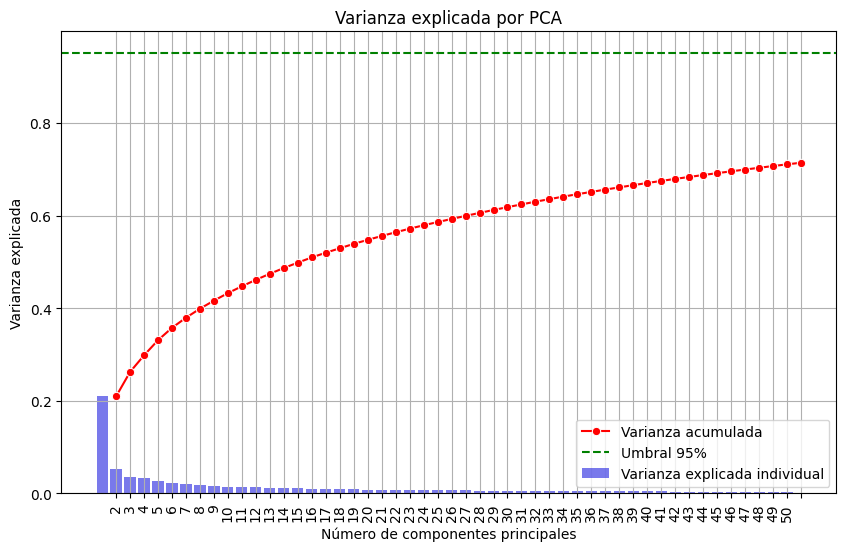

mainDepartment  \
0       Sports and Outdoors   
1                 Computers   
2                 Computers   
3          Home and Kitchen   
4  Beauty and Personal Care   

                                          reviewText  \
0  Nice lightweight brace but unfortunately was t...   
1  Boxers were ok. The color did start to fade pr...   
2  Very easy to install. Worked right away but it...   
3  The color is completely different than hunter ...   
4  From reading the reviews, I was hoping that th...   

                                        cleaned_text  pca_componente_0  \
0  nice lightweight brace unfortunately large wri...         -1.737023   
1  boxer ok color start fade pretty quickly becom...         -1.354772   
2  easy install work right away go far expectedit...         -1.172029   
3  color completely different hunter green andor ...          0.613618   
4  read review hope shampoo conditioner would ext...         -1.651781   

   pca_componente_1  pca_componente_2  pca_componente_3  pca_componente_4  \
0          0.138919          0.540685          1.831551          0.825065   
1          0.450259         -0.806671         -0.289484          0.153972   
2          0.194203          1.651116         -0.469728         -0.197282   
3          1.368133          0.029978         -0.165945         -0.380790   
4          1.404015         -0.452546          1.298912         -1.138956   

   pca_componente_5  pca_componente_6  pca_componente_7  pca_componente_8  \
0         -1.224132          1.701570          1.507068         -0.996086   
1          0.126856          0.752519         -0.707800         -0.744304   
2         -0.567803          0.603064         -0.304851          0.920319   
3         -0.534966         -1.106960          0.743795          0.043152   
4          0.542824         -1.267730          0.119594         -0.210921   

   pca_componente_9  pca_componente_10  pca_componente_11  pca_componente_12  \
0          0.889881           0.101618          -0.150049          -0.189391   
1         -0.792104           0.481456          -0.501408          -0.055421   
2          0.422283           1.736928          -0.540119           0.252686   
3         -1.556921           0.868671           0.042589           0.195575   
4         -0.220329           0.065156           0.044938           0.355641   

   pca_componente_13  pca_componente_14  pca_componente_15  pca_componente_16  \
0           0.264085          -0.716549          -0.226180          -0.114401   
1           0.888569          -0.426231          -0.102907           0.316122   
2           0.014490          -0.121876          -0.046235          -0.775670   
3          -0.268169           0.245033           0.642357           0.372071   
4          -0.177497          -0.214453          -0.091516          -0.533840   

   pca_componente_17  pca_componente_18  pca_componente_19  pca_componente_20  \
0          -0.738969          -0.084889           0.202612          -0.436443   
1           0.627822          -0.502618          -0.648336          -0.143428   
2           0.423979          -0.427448          -0.325301           0.394585   
3           1.303808           0.728140           0.154673           0.369039   
4           0.364179           0.078243           0.335820           0.374743   

   pca_componente_21  pca_componente_22  pca_componente_23  pca_componente_24  \
0           0.399050           0.035928           0.359052          -0.455224   
1           0.280346           0.062338          -0.479629           0.787538   
2          -0.087104           0.569500          -0.129387           0.005927   
3           0.415967          -1.012096           0.546785           1.031551   
4           0.123743           0.173442           0.256800           0.025159   

   pca_componente_25  pca_componente_26  pca_componente_27  pca_componente_28  \
0          -0.201536           0.067684          -0.097840          -0.335097   
1           0.

In [23]:
# Instanciar la clase para reducción de dimensionalidad
GestorDimensiones = sn.ReduccionDimensionalidadPCA(n_componentes=50)

# Lista de columnas de embeddings a reducir
columnas_embeddings = [f"embedding_{i}" for i in range(768)]

# Aplicar reducción de dimensionalidad
df_reducido_emb = GestorDimensiones.ajustar_transformar(embeddings_df, columnas_embeddings)

# Mostrar la varianza explicada por los componentes principales
varianza_acumulada = GestorDimensiones.explicar_varianza(mostrar_grafico=True)

# El DataFrame 'df_reducido' contiene las nuevas columnas reducidas como 'pca_componente_0', ..., 'pca_componente_49'
df_reducido_emb.head()

Aplicando PCA para reducir 5001 dimensiones a 50 dimensiones...
Advertencia: se encontraron valores faltantes. Estos serán rellenados con 0.
Reducción completada. Nuevas dimensiones agregadas al DataFrame.


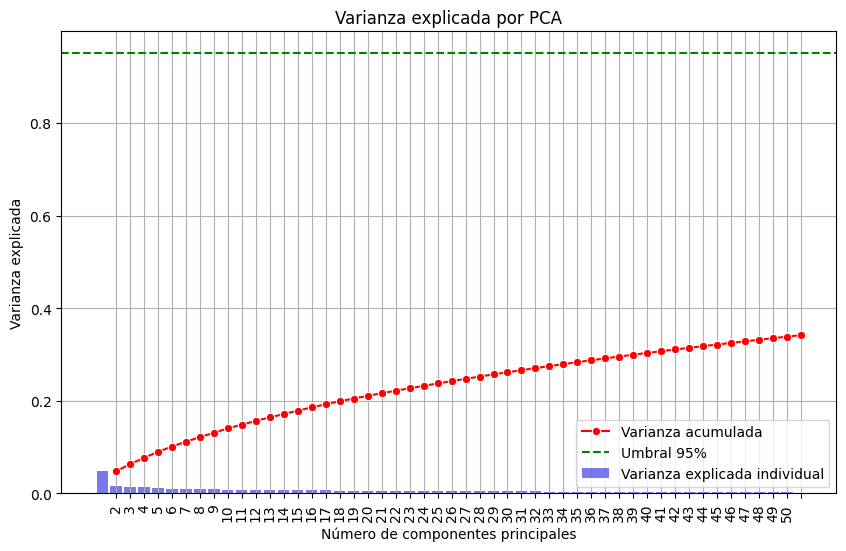

reviewText  \
0  Nice lightweight brace but unfortunately was t...   
1  Boxers were ok. The color did start to fade pr...   
2  Very easy to install. Worked right away but it...   
3  The color is completely different than hunter ...   
4  From reading the reviews, I was hoping that th...   

                                        cleaned_text  pca_componente_0  \
0  nice lightweight brace unfortunately large wri...         -0.564056   
1  boxer ok color start fade pretty quickly becom...         -0.614815   
2  easy install work right away go far expectedit...         -0.154941   
3  color completely different hunter green andor ...         -0.669434   
4  read review hope shampoo conditioner would ext...          0.030955   

   pca_componente_1  pca_componente_2  pca_componente_3  pca_componente_4  \
0         -0.127051          0.174456          0.021166         -0.056150   
1         -0.029619          0.176619          0.124866         -0.053132   
2         -0.331144         -0.456242          0.332497          0.021435   
3         -0.021962          0.096858          0.017893         -0.076414   
4         -0.252589         -0.686643          0.030858          0.857513   

   pca_componente_5  pca_componente_6  pca_componente_7  pca_componente_8  \
0         -0.023588         -0.131375          0.103985          0.134121   
1         -0.018513         -0.073367          0.035958         -0.014834   
2         -0.320741         -0.314377         -0.330919         -0.547380   
3         -0.011688          0.012479          0.121111          0.121699   
4         -0.050583         -0.073466         -0.128936          0.477217   

   pca_componente_9  pca_componente_10  pca_componente_11  pca_componente_12  \
0          0.099837           0.015338           0.227580           0.054833   
1         -0.098370          -0.002947           0.032469           0.010288   
2         -0.162850          -0.481511          -0.033077           0.061431   
3         -0.062251           0.037816           0.091900           0.024701   
4          0.289958          -0.751404          -0.646437           0.199275   

   pca_componente_13  pca_componente_14  pca_componente_15  pca_componente_16  \
0          -0.055405           0.389607           0.134412           0.187783   
1          -0.157271          -0.005229           0.111344           0.160845   
2           0.331028          -0.204889           0.101260           0.116256   
3           0.025144           0.109565           0.010513           0.041468   
4          -0.270900           0.607695          -0.717342           0.009792   

   pca_componente_17  pca_componente_18  pca_componente_19  pca_componente_20  \
0           0.499173          -0.093420          -0.109807           0.456153   
1          -0.053635           0.126399           0.120898           0.067228   
2           0.179611           0.209285          -0.219727          -0.104654   
3          -0.069532           0.047993           0.084236          -0.104743   
4          -0.126497          -0.129490          -0.056386          -0.098371   

   pca_componente_21  pca_componente_22  pca_componente_23  pca_componente_24  \
0           0.340810           0.023903           0.219995           0.171696   
1           0.079307          -0.045339           0.092601          -0.099419   
2          -0.265825          -0.122925          -0.177874          -0.051262   
3          -0.074672          -0.119229           0.112481           0.100884   
4           0.028861          -0.028833          -0.123089          -0.332382   

   pca_componente_25  pca_componente_26  pca_componente_27  pca_componente_28  \
0           0.358947          -0.127644           0.323055          -0.342123   
1          -0.052497           0.157783          -0.012159          -0.026549   
2          -0.011225          -0.067810          -0.187051          -0.485307   
3           0.100113          -0.025874           0.215181          

In [24]:
# Seleccionar columnas numéricas para reducir
columnas_a_reducir_bow = bow_df.columns.difference(['reviewText', 'mainDepartament', 'cleaned_text'])


# Aplicar reducción de dimensionalidad
df_reducido_bow = GestorDimensiones.ajustar_transformar(bow_df, columnas_a_reducir_bow)

# Mostrar la varianza explicada por los componentes principales
varianza_acumulada_bow = GestorDimensiones.explicar_varianza(mostrar_grafico=True)

# El DataFrame 'df_reducido' contiene las nuevas columnas reducidas como 'pca_componente_0', ..., 'pca_componente_49'
df_reducido_bow.head()

Aplicando PCA para reducir 5001 dimensiones a 50 dimensiones...
Advertencia: se encontraron valores faltantes. Estos serán rellenados con 0.
Reducción completada. Nuevas dimensiones agregadas al DataFrame.


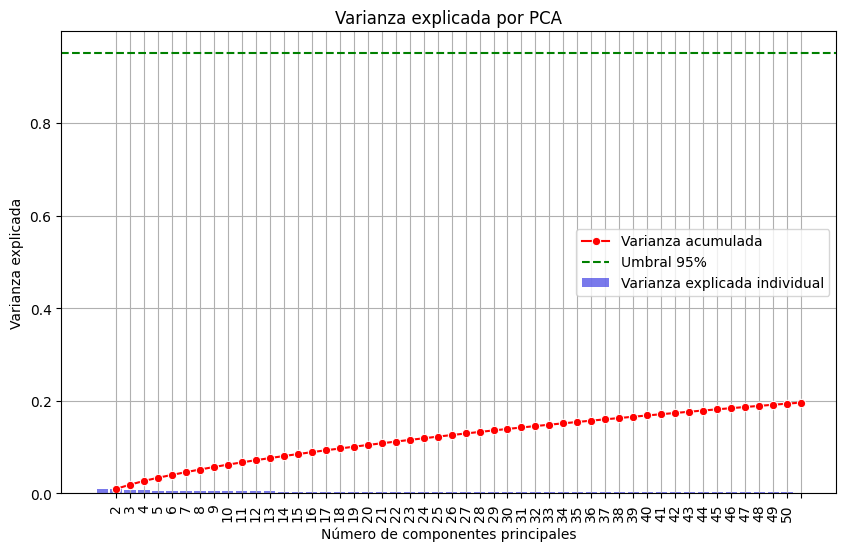

reviewText  \
0  Nice lightweight brace but unfortunately was t...   
1  Boxers were ok. The color did start to fade pr...   
2  Very easy to install. Worked right away but it...   
3  The color is completely different than hunter ...   
4  From reading the reviews, I was hoping that th...   

                                        cleaned_text  pca_componente_0  \
0  nice lightweight brace unfortunately large wri...         -0.071950   
1  boxer ok color start fade pretty quickly becom...         -0.047514   
2  easy install work right away go far expectedit...          0.096621   
3  color completely different hunter green andor ...         -0.038515   
4  read review hope shampoo conditioner would ext...          0.067756   

   pca_componente_1  pca_componente_2  pca_componente_3  pca_componente_4  \
0         -0.049753         -0.003431         -0.115123          0.063457   
1          0.003579          0.015431         -0.048183          0.015327   
2          0.183150         -0.096718         -0.000267         -0.058880   
3         -0.038624          0.002582         -0.031975          0.027784   
4         -0.028522         -0.061541          0.052518          0.031288   

   pca_componente_5  pca_componente_6  pca_componente_7  pca_componente_8  \
0         -0.034157          0.098481          0.112489          0.105840   
1          0.007538         -0.018794         -0.016950          0.044496   
2          0.104835         -0.062416          0.121496          0.033633   
3          0.021247         -0.011218         -0.012483          0.031971   
4         -0.032446          0.016250          0.039596         -0.025072   

   pca_componente_9  pca_componente_10  pca_componente_11  pca_componente_12  \
0         -0.047568          -0.078097           0.098898          -0.050763   
1          0.041942          -0.019470          -0.057774           0.023749   
2         -0.005639          -0.011014          -0.109742           0.038217   
3          0.018645          -0.022404          -0.038738           0.003248   
4          0.162105           0.064673           0.007352          -0.168326   

   pca_componente_13  pca_componente_14  pca_componente_15  pca_componente_16  \
0           0.012642          -0.032490          -0.015961           0.021026   
1           0.051154           0.039711          -0.000645          -0.012837   
2           0.013130          -0.086935           0.003857          -0.004648   
3          -0.021853           0.026249           0.012257          -0.015715   
4           0.000785           0.018884          -0.024012           0.016417   

   pca_componente_17  pca_componente_18  pca_componente_19  pca_componente_20  \
0          -0.008239          -0.009844           0.012428          -0.024427   
1           0.031776          -0.004555          -0.001667           0.068667   
2           0.164956           0.018215           0.179055           0.000702   
3          -0.020575          -0.012361          -0.019160           0.034979   
4           0.007364           0.081104           0.003378           0.005770   

   pca_componente_21  pca_componente_22  pca_componente_23  pca_componente_24  \
0          -0.053746           0.001528          -0.019947          -0.007396   
1          -0.031356           0.259542           0.077407           0.097412   
2           0.106005          -0.018940          -0.057524          -0.118373   
3           0.024830          -0.005802           0.010738          -0.044138   
4          -0.017727          -0.006885           0.017633           0.009654   

   pca_componente_25  pca_componente_26  pca_componente_27  pca_componente_28  \
0           0.016840           0.025847           0.013918           0.002919   
1          -0.070935          -0.005570          -0.021086          -0.036608   
2           0.036778          -0.019513          -0.039672           0.016831   
3          -0.052251          -0.037003          -0.005593          

In [25]:
# Seleccionar columnas numéricas para reducir
columnas_a_reducir_tf = bow_df.columns.difference(['reviewText', 'mainDepartament', 'cleaned_text'])


# Aplicar reducción de dimensionalidad
df_reducido_tf = GestorDimensiones.ajustar_transformar(tfidf_df, columnas_a_reducir_tf)

# Mostrar la varianza explicada por los componentes principales
varianza_acumulada_tf = GestorDimensiones.explicar_varianza(mostrar_grafico=True)

# El DataFrame 'df_reducido' contiene las nuevas columnas reducidas como 'pca_componente_0', ..., 'pca_componente_49'
df_reducido_tf.head()

In [26]:
# Crear un diccionario de mapeo
valores_unicos = df_reducido_emb['mainDepartament'].unique()
mapear_status = {value: i for i, value in enumerate(valores_unicos)}
df_reducido_emb["mainDepartament"] = df_reducido_emb["mainDepartament"].map(mapear_status)

X = df_reducido_emb.iloc[:, 3:]
y = df_reducido_emb["mainDepartament"]

KeyError: 'mainDepartament'

In [ ]:
GestorModelo = sn.ClasificacionTextoAvanzada(modelo="random_forest")

X_train, X_test, y_train, y_test = GestorModelo.dividir_datos(X, y, test_size=0.3)

# Entrenamiento
GestorModelo.entrenar(X_train, y_train)

# Validación cruzada
GestorModelo.validar(X_train, y_train)

parametros = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

GestorModelo.ajustar_hyperparametros(X_train, y_train, parametros)